# 1. EDA and Data Cleaning

In [152]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

> Personal data are removed, province names are also encoded to protect patients privacy.

In [153]:
hbp = pd.read_csv("../data/high_blood_pressure_VN_2020.csv")
hbp.info()
hbp.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20770 entries, 0 to 20769
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   survey_time                 18536 non-null  object 
 1   survey_year                 20768 non-null  float64
 2   birth_year                  20555 non-null  object 
 3   gender                      20770 non-null  int64  
 4   body_height                 19808 non-null  float64
 5   body_weight                 19860 non-null  float64
 6   smoker                      19993 non-null  float64
 7   high_blood_pressure         20770 non-null  int64  
 8   under_treatment             19953 non-null  float64
 9   lipid                       19448 non-null  float64
 10  diabetes                    19681 non-null  float64
 11  systolic_blood_pressure_1   20737 non-null  float64
 12  diastolic_blood_pressure_1  20739 non-null  float64
 13  heart_rate_1                206

,survey_time,survey_year,birth_year,gender,body_height,body_weight,smoker,high_blood_pressure,under_treatment,lipid,diabetes,systolic_blood_pressure_1,diastolic_blood_pressure_1,heart_rate_1,systolic_blood_pressure_2,diastolic_blood_pressure_2,heart_rate_2,province_enc
0,19/2/2020,2020.0,1963,1,NaN,NaN,1.0,0,NaN,NaN,NaN,130.0,70.0,78.0,120.0,80.0,78.0,0
1,01/01/2020,2020.0,1949,1,160.0,50.0,0.0,0,0.0,0.0,0.0,124.0,70.0,68.0,120.0,70.0,72.0,0
2,12/12/2018,2018.0,2001,1,165.0,52.0,0.0,0,0.0,0.0,0.0,100.0,60.0,90.0,110.0,70.0,90.0,0
3,01/01/2020,2020.0,1960,1,160.0,63.0,0.0,1,1.0,0.0,0.0,130.0,79.0,87.0,123.0,74.0,87.0,0
4,01/01/2020,2020.0,1950,1,164.0,61.0,0.0,0,0.0,0.0,0.0,118.0,86.0,73.0,110.0,60.0,80.0,0


In [154]:
hbp.isna().sum().sort_values(ascending=False)

survey_time                   2234
heart_rate_2                  2218
lipid                         1322
diabetes                      1089
systolic_blood_pressure_2     1017
diastolic_blood_pressure_2    1017
body_height                    962
body_weight                    910
under_treatment                817
smoker                         777
birth_year                     215
heart_rate_1                   157
systolic_blood_pressure_1       33
diastolic_blood_pressure_1      31
survey_year                      2
gender                           0
high_blood_pressure              0
province_enc                     0
dtype: int64

## 1.1. Fix birth_year and Calculate Age

In [155]:
#survey time doesn't have the correct dtype, but we won't use this column
#we will only need the survey_year and the birth_year to calculate the age

In [156]:
#birth_year should be 4 digits
hbp["birth_year"].str.len().value_counts()

4.0     20553
10.0        2
Name: birth_year, dtype: int64

In [157]:
#those with 10 digits include month, date
hbp[hbp["birth_year"].str.len()==10]

,survey_time,survey_year,birth_year,gender,body_height,body_weight,smoker,high_blood_pressure,under_treatment,lipid,diabetes,systolic_blood_pressure_1,diastolic_blood_pressure_1,heart_rate_1,systolic_blood_pressure_2,diastolic_blood_pressure_2,heart_rate_2,province_enc
5010,04/12/2019,2019.0,04/29/1905,1,160.0,56.0,1.0,1,1.0,0.0,0.0,141.0,81.0,87.0,136.0,80.0,89.0,6
8256,09/12/2019,2019.0,04/19/1905,2,150.0,42.0,0.0,0,0.0,3.0,1.0,138.0,94.0,89.0,130.0,80.0,87.0,6


In [158]:
#use year only
hbp["birth_year"].replace('04/29/1905', '1905', inplace = True)
hbp["birth_year"].replace('04/19/1905', '1905', inplace = True)

In [159]:
#double check
hbp["birth_year"].str.len().value_counts()

4.0    20555
Name: birth_year, dtype: int64

In [160]:
#convert to float, can't use int because there are NaN
hbp["birth_year"] = hbp["birth_year"].astype(float)

In [161]:
#calculate age
hbp["age"] = hbp["survey_year"] - hbp["birth_year"]

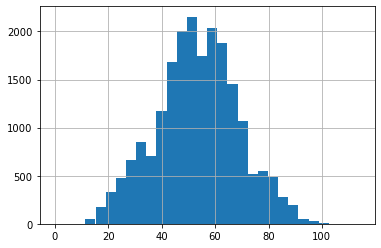

In [162]:
#age distribution
#near normal distribution, avg. age is ~55
hbp["age"].hist(bins = 30);

## 2.2. Gender

In [163]:
hbp["gender"].value_counts()
#from original data 1 is male, 2 is female
#might need to change to 0 and 1 later

2    12375
1     8395
Name: gender, dtype: int64

In [164]:
hbp["gender"].value_counts(normalize = True)
#60% female, 40% male

2    0.595811
1    0.404189
Name: gender, dtype: float64

## 2.3. Body height (in cm)

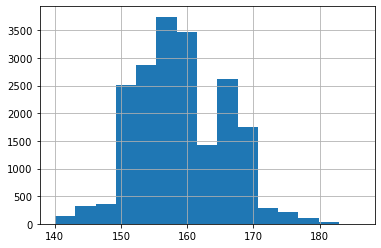

In [165]:
hbp["body_height"].hist(bins=15);
#mean around 160 cm or 5'3"

## 2.4. Body weight (in kg)

In [166]:
hbp["body_weight"].value_counts().sort_index()
#body_weight of 3 kg or 7 lb, probably a mistake
#let's replace it with the mean

3.0      1
32.0    12
32.5     1
33.0     5
34.0    15
        ..
89.0     2
90.0     3
91.0     1
93.0     1
98.0     1
Name: body_weight, Length: 114, dtype: int64

In [167]:
(hbp["body_weight"]).mean()

54.51700402842788

In [168]:
hbp["body_weight"].replace(3.0, 54.5, inplace = True)

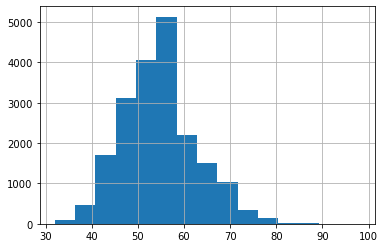

In [169]:
#body_weight distribution
#a little right skewed
#mean around 55 kg or 120 lb
hbp["body_weight"].hist(bins=15);

## 2.5. Smoker

In [170]:
hbp["smoker"].value_counts()

0.0    16365
1.0     3590
3.0       37
2.0        1
Name: smoker, dtype: int64

In [171]:
#0 is non-smoker, 1 is smoker
#why 2 and 3?

## 2.6. High blood pressure

In [172]:
hbp["high_blood_pressure"].value_counts()

0    15862
1     4741
3      166
2        1
Name: high_blood_pressure, dtype: int64

In [173]:
#0 means no high blood pressure
#1 means high blood pressure
#why 2 and 3?

## 2.7. Under_treatment

In [174]:
hbp["under_treatment"].value_counts()

0.0    15474
1.0     4359
3.0      119
2.0        1
Name: under_treatment, dtype: int64

In [175]:
#float because there are NaN
#0.0 means currently not under treament
#1.0 means currently receiving treatment
#why 2.0 and 3.0?

In [176]:
len(hbp[(hbp["high_blood_pressure"]==1) & (hbp["under_treatment"]==1.0)])
#most people with high blood pressure are receiving treament

4132

## 2.8. Lipid

In [177]:
hbp["lipid"].value_counts()

0.0    16325
3.0     1795
1.0     1328
Name: lipid, dtype: int64

In [178]:
#not exactly sure about his indicator
#0.0 probably means normal blood lipid level
#1.0 and 3.0 means elevated levels

## 2.9. Diabetes

In [179]:
hbp["diabetes"].value_counts()

0.0    16776
1.0     1555
3.0     1350
Name: diabetes, dtype: int64

In [180]:
#float because of NaN
#0 means no diabete
#1 means having diabete
#why 3?

## 2.10. Systolic blood pressure 1

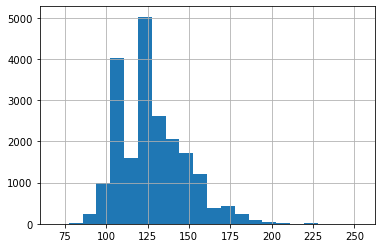

In [181]:
hbp["systolic_blood_pressure_1"].hist(bins=22);
#look reasonable

## 2.11. Diastolic blood pressure 1

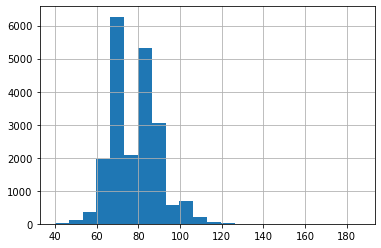

In [182]:
hbp["diastolic_blood_pressure_1"].hist(bins=22);

In [183]:
hbp[hbp["diastolic_blood_pressure_1"] > hbp["systolic_blood_pressure_1"]]
#there might be something wrong the first set of pressure in this case
#the second set looks normal

,survey_time,survey_year,birth_year,gender,body_height,body_weight,smoker,high_blood_pressure,under_treatment,lipid,diabetes,systolic_blood_pressure_1,diastolic_blood_pressure_1,heart_rate_1,systolic_blood_pressure_2,diastolic_blood_pressure_2,heart_rate_2,province_enc,age
8727,01/01/2020,2020.0,1983.0,2,153.0,59.0,0.0,0,0.0,0.0,0.0,126.0,136.0,90.0,120.0,70.0,75.0,14,37.0


## 2.12. Heart Rate 1

In [184]:
hbp["heart_rate_1"].value_counts().sort_index(ascending=False).head(10)
#heart rates over 400 look odd

12183.0    1
984.0      1
820.0      1
763.0      1
582.0      1
403.0      1
175.0      1
160.0      1
148.0      1
145.0      1
Name: heart_rate_1, dtype: int64

In [185]:
hbp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20770 entries, 0 to 20769
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   survey_time                 18536 non-null  object 
 1   survey_year                 20768 non-null  float64
 2   birth_year                  20555 non-null  float64
 3   gender                      20770 non-null  int64  
 4   body_height                 19808 non-null  float64
 5   body_weight                 19860 non-null  float64
 6   smoker                      19993 non-null  float64
 7   high_blood_pressure         20770 non-null  int64  
 8   under_treatment             19953 non-null  float64
 9   lipid                       19448 non-null  float64
 10  diabetes                    19681 non-null  float64
 11  systolic_blood_pressure_1   20737 non-null  float64
 12  diastolic_blood_pressure_1  20739 non-null  float64
 13  heart_rate_1                206

In [187]:
#remove 6 records with extremly high heart_rate_1
heart_rate_1_normal = ~(hbp["heart_rate_1"] > 400)
hbp = hbp[heart_rate_1_normal]

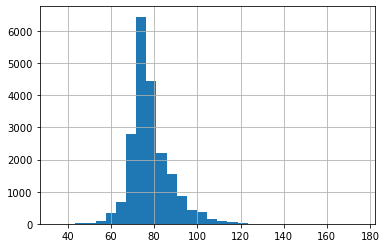

In [191]:
hbp["heart_rate_1"].hist(bins=30);
#heart_rate_1 distribution

## 2.13. Systolic blood pressure 2

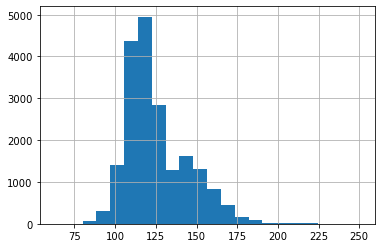

In [192]:
hbp["systolic_blood_pressure_2"].hist(bins=22);
#look reasonable

## 2.14. Diastolic blood pressure 2

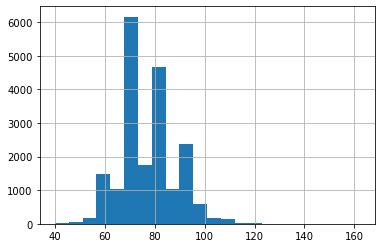

In [194]:
hbp["diastolic_blood_pressure_2"].hist(bins=22);
#look reasonable

## 2.15. Heart Rate 2

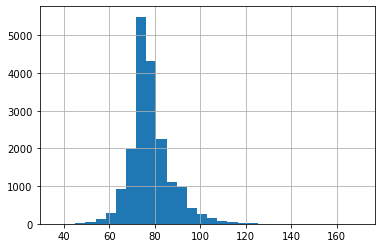

In [196]:
hbp["heart_rate_2"].hist(bins=30);
#heart_rate_2 distribution

# 2. 